# Logistic-regression-on-imbalanced-health-data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import jovian

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
data_dir = './work'

In [4]:
import os
os.listdir(data_dir)

['healthcare-dataset-stroke-data.csv']

In [5]:
data = pd.read_csv(data_dir + '/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.drop(columns=['id'],inplace=True)

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.shape

(5110, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Descriptive

In [11]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

## How do you get to know imbalanced classification?

Text(0.5, 1.0, 'Stroke')

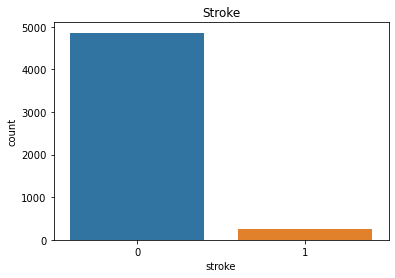

In [14]:
sns.countplot(x="stroke", data=data)
plt.title("Stroke")

0    4861
1     249
Name: stroke, dtype: int64


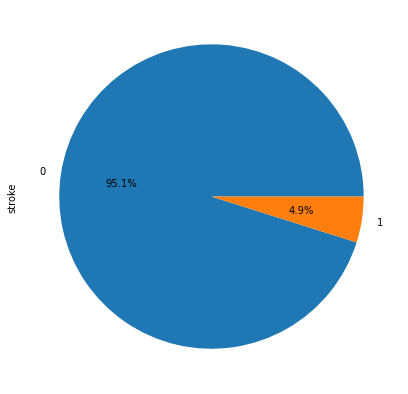

In [15]:
print(data["stroke"].value_counts())
data["stroke"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7));

## Plots

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

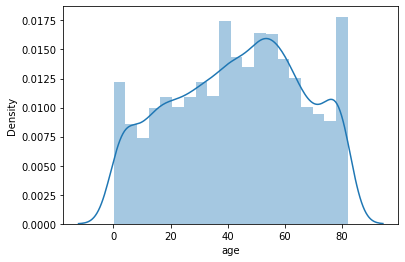

In [16]:
sns.distplot(data['age'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

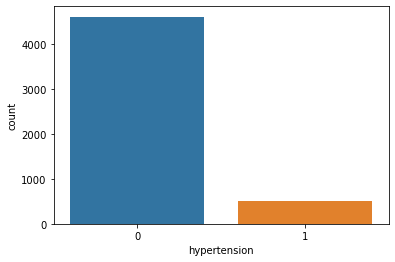

In [17]:
sns.countplot(data['hypertension'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

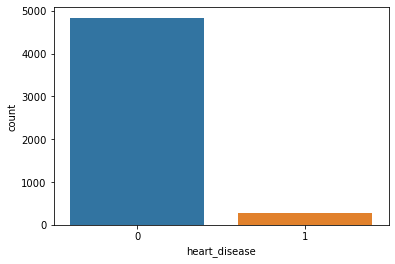

In [18]:
sns.countplot(data['heart_disease'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

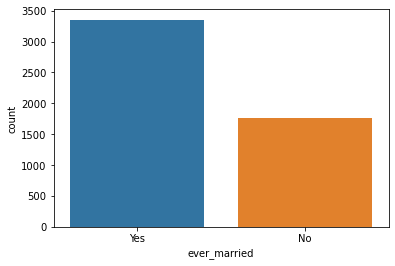

In [19]:
sns.countplot(data['ever_married'])

In [20]:
data['isOld'] = np.where(data['age']>50,1,0)

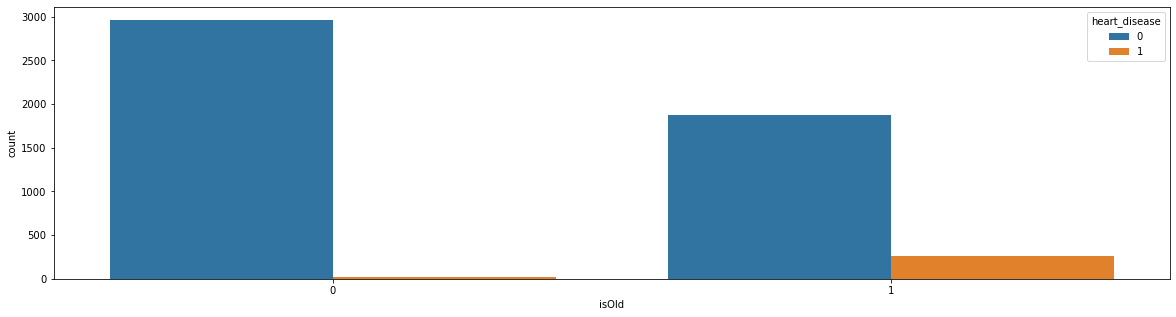

In [21]:
plt.figure(figsize=[20,5])
sns.countplot(x= data['isOld'], data=data, hue=data['heart_disease'])
plt.show()

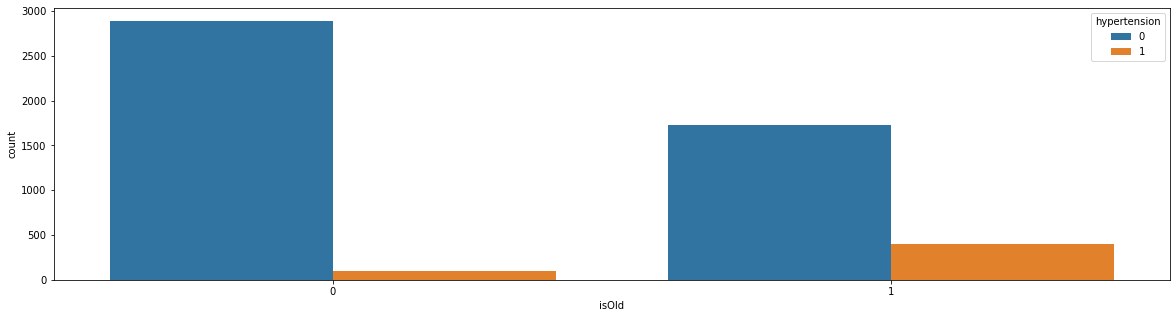

In [22]:
plt.figure(figsize=[20,5])
sns.countplot(x= data['isOld'], data=data, hue=data['hypertension'])
plt.show()

In [23]:
data['highsugar'] = np.where(data['avg_glucose_level']>120,1,0)

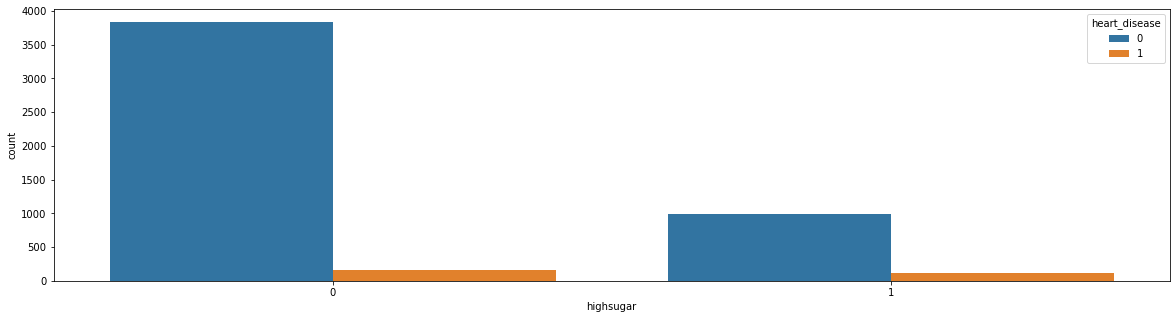

In [24]:
plt.figure(figsize=[20,5])
sns.countplot(x= data['highsugar'], data=data, hue=data['heart_disease'])
plt.show()

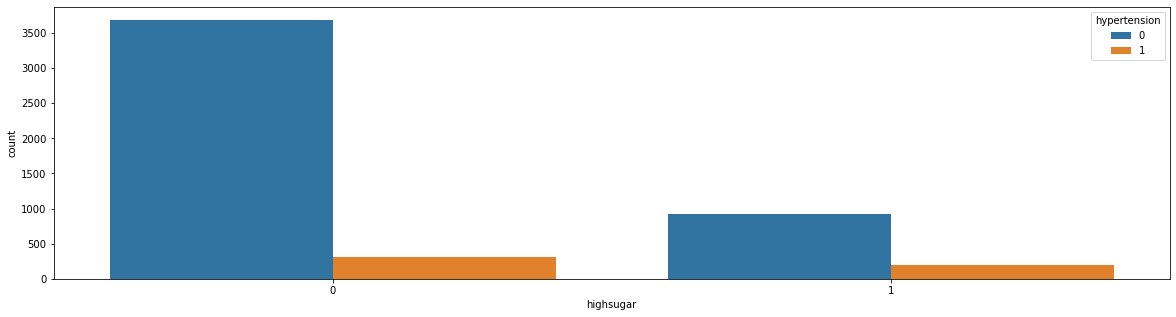

In [25]:
plt.figure(figsize=[20,5])
sns.countplot(x= data['highsugar'], data=data, hue=data['hypertension'])
plt.show()

## Data PreProcessing

In [26]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'isOld', 'highsugar'],
      dtype='object')

In [27]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [28]:
data=data.fillna(np.mean(data['bmi']))

In [29]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,isOld,highsugar
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.416243,0.218982
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492983,0.413597
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000


In [30]:
corr= data.corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,isOld,highsugar
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,0.822533,0.174740
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.261979,0.132344
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.249602,0.130966
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.239543,0.850182
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,0.183906,0.127349
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.225617,0.104340
isOld,0.822533,0.261979,0.249602,0.239543,0.183906,0.225617,1.000000,0.174929
highsugar,0.174740,0.132344,0.130966,0.850182,0.127349,0.104340,0.174929,1.000000


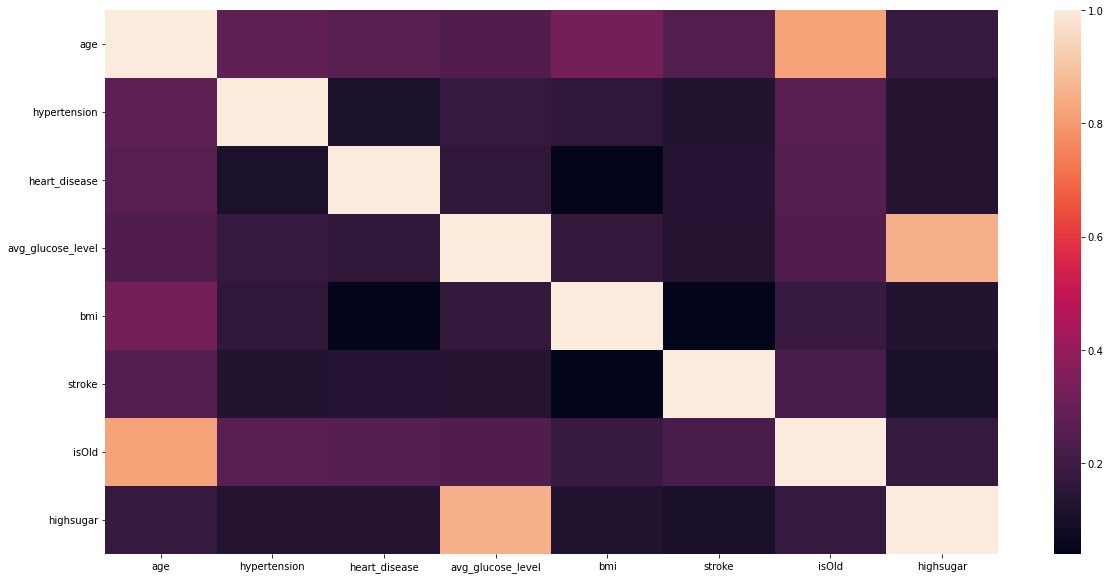

In [31]:
plt.figure(figsize=[20,10])
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns)

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

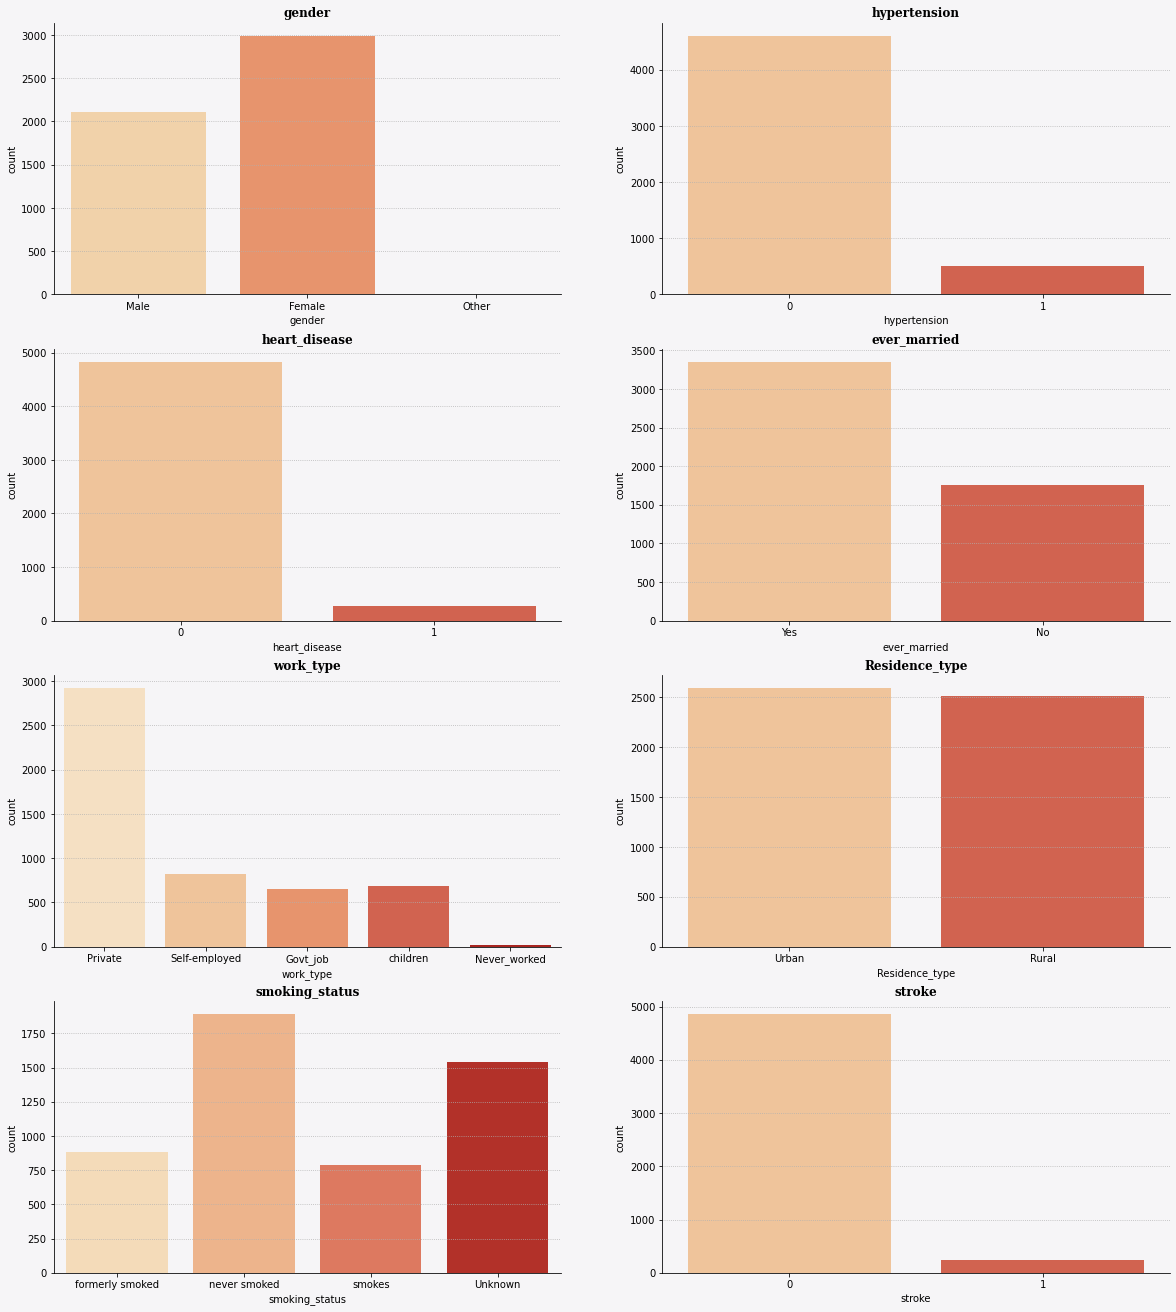

In [32]:
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette='OrRd')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

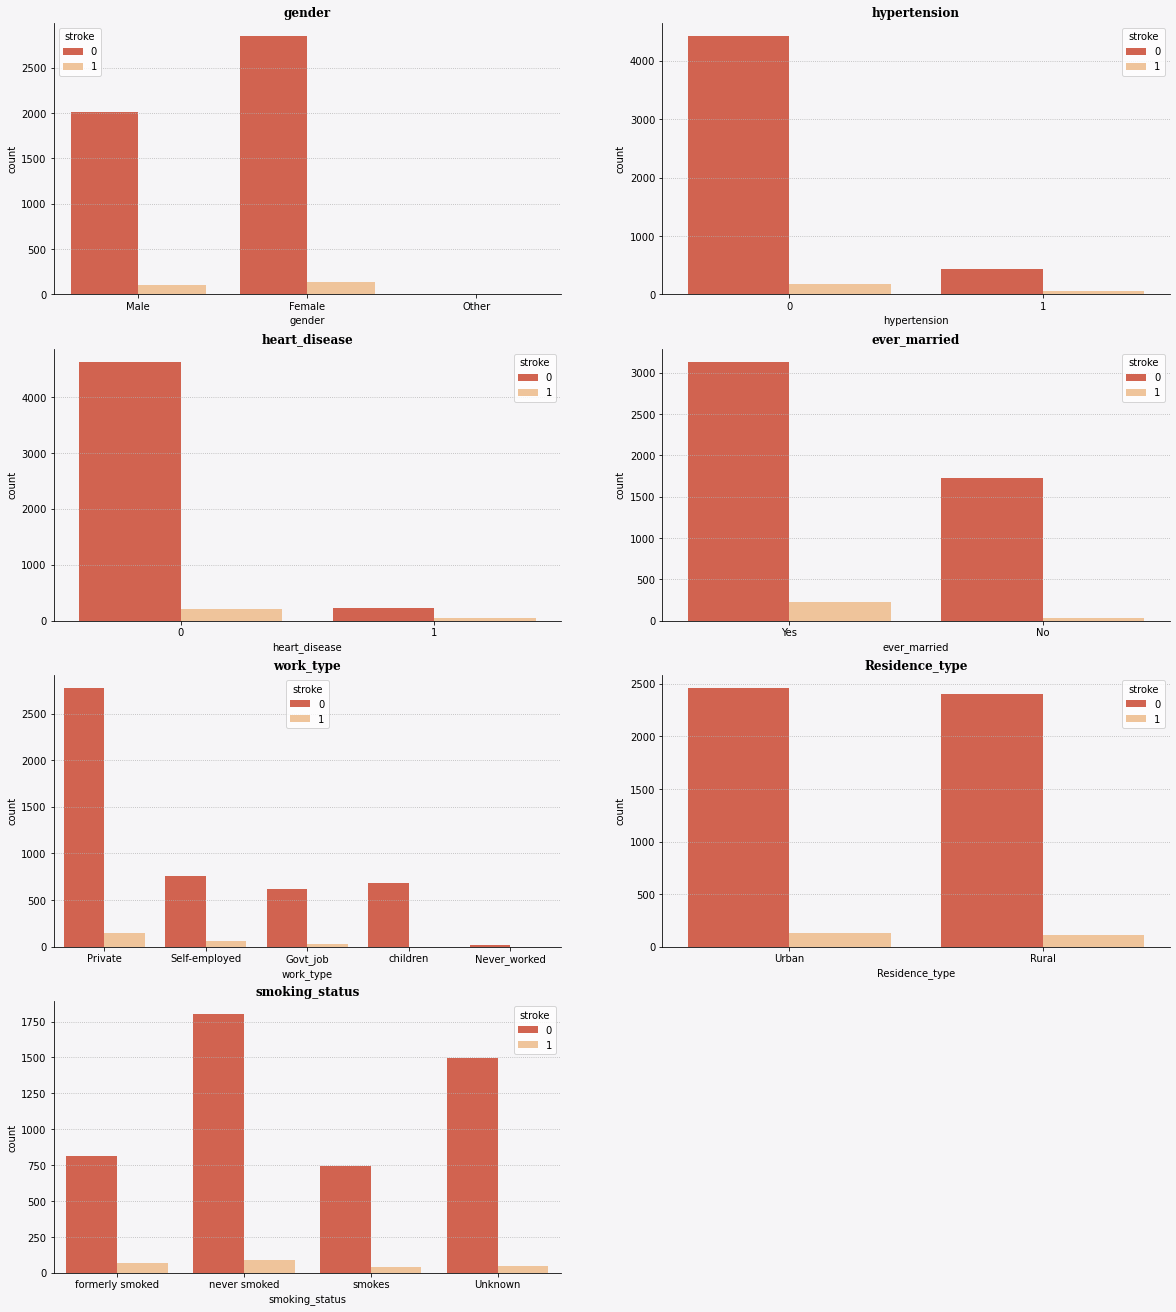

In [33]:
data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=data['stroke'])

## Bivariate Analysis

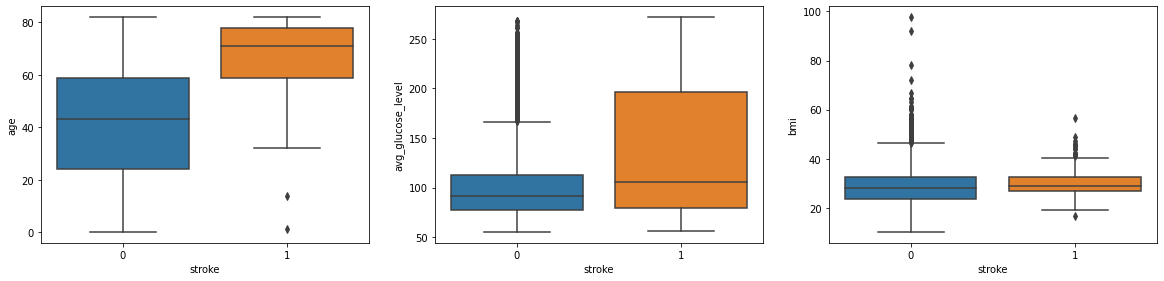

In [34]:
index = 0
plt.figure(figsize=(20,20))
for feature in data_numerical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='stroke', y=feature, data=data)

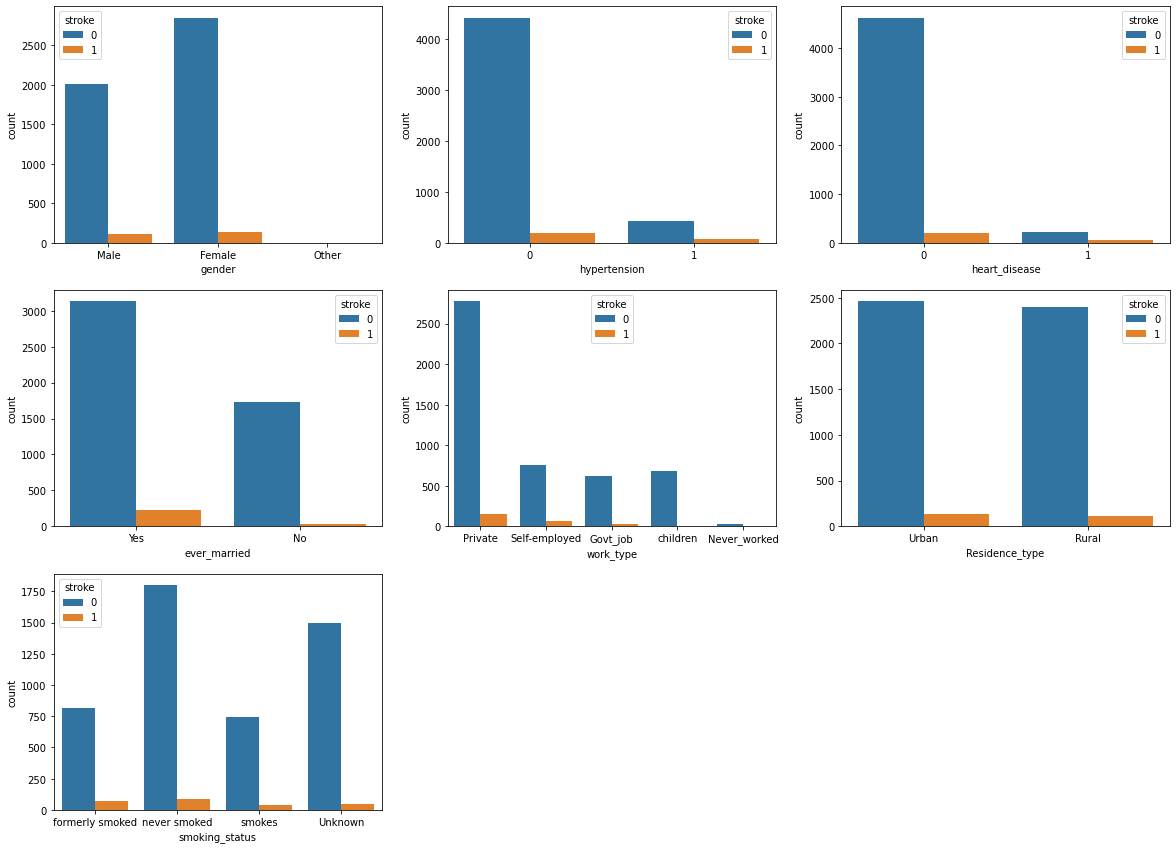

In [35]:
index = 0
plt.figure(figsize=(20,20))
for feature in data_categorical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.countplot(data = data, x =feature, hue = "stroke")

In [36]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# Removing the observations that have smoking type unknown. 
data=data[data['smoking_status']!='Unknown']

In [37]:
# One Hot encoding smoking_status, work_type
data_dummies = data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)

In [38]:
new_data = data.copy()
print(new_data['stroke'].value_counts())

0    3364
1     202
Name: stroke, dtype: int64


In [39]:
new_data.sample(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,isOld,highsugar
3130,0,77.0,1,0,1,0,176.71,33.2,0,1,1
243,0,68.0,1,1,1,1,247.51,40.5,1,1,1
1418,1,54.0,0,0,1,0,150.27,38.2,0,1,1


In [40]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

In [41]:
# data_x = data
# data_y = data_stroke

## Model Building and Training

In [45]:
!pip install -U scikit-learn

     |████████████████████████████████| 10.9 MB 28.0 MB/s            
     |████████████████████████████████| 301 kB 86.8 MB/s            
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [46]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 235 kB 17.1 MB/s            


In [47]:
import imblearn
import sklearn

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

## Scaled Logistic Reg in imbalanced class problem

In [49]:
x_train,x_test,y_train,y_test = train_test_split(data,data_stroke,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression

lr_imb=LogisticRegression(random_state=42)
lr_imb_model=lr_imb.fit(x_train,y_train)
lr_pred=lr_imb_model.predict(x_test)

print('--------Classification report of imbalanced logistic regression ---------- \n\n',classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test,lr_pred))

--------Classification report of imbalanced logistic regression ---------- 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96       665
           1       0.00      0.00      0.00        49

    accuracy                           0.93       714
   macro avg       0.47      0.50      0.48       714
weighted avg       0.87      0.93      0.90       714


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0

 Confusion Matrix:
 [[665   0]
 [ 49   0]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

In [52]:
new_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,isOld,highsugar
0,1,67.0,0,1,1,1,228.69,36.600000,1,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,1,1,1
2,1,80.0,0,1,1,0,105.92,32.500000,1,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,1
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0


In [53]:
print(new_data["stroke"].value_counts())

0    3364
1     202
Name: stroke, dtype: int64


## Up sampling and SMOTE using the Sklearn

In [54]:
data_n1 = new_data.copy()

In [55]:
df_test= data_n1[:180]
df_train= data_n1[180:]


X_test = df_test.drop('stroke', axis=1)
Y_test = df_test['stroke']

In [56]:
# Separate majority and minority classes
df_majority = df_train[df_train.stroke==0]
df_minority = df_train[df_train.stroke==1]

In [57]:
df_majority.shape, df_minority.shape

((3364, 11), (22, 11))

In [58]:
X_test.shape, Y_test.shape

((180, 10), (180,))

In [59]:
from sklearn.utils import resample

In [60]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3342,    # to match majority class
                                 random_state=123) 

Upsampling on the dataset is done for increasing the size of the minority class in the dataset

In [61]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [62]:
df_upsampled.shape

(6706, 11)

In [63]:
df_up= df_upsampled.sample(frac=1)
df_up

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,isOld,highsugar
4503,0,39.0,0,0,0,0,90.11,23.6,0,0,0
1316,0,21.0,0,0,0,1,134.45,29.1,0,0,1
230,0,81.0,0,0,1,0,81.95,16.9,1,1,0
221,1,79.0,0,0,1,0,72.73,28.4,1,1,0
3421,0,51.0,0,0,1,0,85.59,30.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3803,0,44.0,1,0,1,0,69.48,41.3,0,0,0
230,0,81.0,0,0,1,0,81.95,16.9,1,1,0
3759,0,62.0,0,0,1,1,101.19,23.4,0,1,0
2188,1,80.0,0,1,1,1,120.09,30.7,0,1,1


In [64]:
df_up['stroke'].value_counts()

0    3364
1    3342
Name: stroke, dtype: int64

In [65]:
# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_up = df_up.drop('stroke', axis=1)
Y_up = df_up['stroke']

X_up.shape, X_test.shape, Y_up.shape, Y_test.shape

((6706, 10), (180, 10), (6706,), (180,))

In [66]:
from sklearn.linear_model import LogisticRegression
logistic_ups = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_up,Y_up)
y_pred = logistic_ups.predict(X_test)

print('----- Classification report of logistic regression Upsampling Minority ------ \n\n',classification_report(Y_test, y_pred))
print("accuracy_score : ", accuracy_score(Y_test, y_pred))
print("precision_score : ", precision_score(Y_test, y_pred))
print("recall_score : ", recall_score(Y_test, y_pred))
print("f1_score : ", f1_score(Y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))

# target_names = ['class 0', 'class 1']
# print(classification_report(Y_test, y_pred, target_names=target_names))
# cf_matrix= confusion_matrix(Y_test, y_pred)
# cf_matrix


----- Classification report of logistic regression Upsampling Minority ------ 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       180

    accuracy                           0.72       180
   macro avg       0.50      0.36      0.42       180
weighted avg       1.00      0.72      0.84       180

accuracy_score :  0.7222222222222222
precision_score :  1.0
recall_score :  0.7222222222222222
f1_score :  0.8387096774193548

 Confusion Matrix:
 [[  0   0]
 [ 50 130]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SMOTE stands for Synthetic Minority Oversampling Technique. 
This is a statistical technique for increasing the number of cases in your dataset in a balanced way. 
The module works by generating new instances from existing minority cases that you supply as input.

In [67]:
data_n2 = new_data.copy()

In [68]:
df_test= data_n2[:180]
df_train= data_n2[180:]

X_test = df_test.drop('stroke', axis=1)
Y_test = df_test['stroke']

In [69]:
df_train.stroke.value_counts()

0    3364
1      22
Name: stroke, dtype: int64

In [70]:
Y_train_smote= df_train['stroke']
X_train_smote= df_train.drop(['stroke'],axis=1)
X_train_smote.shape, Y_train_smote.shape

((3386, 10), (3386,))

In [71]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_smote, Y_train_smote.ravel())

In [72]:
X_train_res.shape, y_train_res.shape

((6728, 10), (6728,))

In [73]:
len(y_train_res[y_train_res==0]), len(y_train_res[y_train_res==1])

(3364, 3364)

In [74]:
from sklearn.linear_model import LogisticRegression
logistic_smote = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train_res,y_train_res)
y_pred = logistic_smote.predict(X_test)

print('----- Classification report of logistic regression SMOTE technique ------ \n\n',classification_report(Y_test, y_pred))
print("accuracy_score : ", accuracy_score(Y_test, y_pred))
print("precision_score : ", precision_score(Y_test, y_pred))
print("recall_score : ", recall_score(Y_test, y_pred))
print("f1_score : ", f1_score(Y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))

----- Classification report of logistic regression SMOTE technique ------ 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.41      0.58       180

    accuracy                           0.41       180
   macro avg       0.50      0.21      0.29       180
weighted avg       1.00      0.41      0.58       180

accuracy_score :  0.4111111111111111
precision_score :  1.0
recall_score :  0.4111111111111111
f1_score :  0.5826771653543308

 Confusion Matrix:
 [[  0   0]
 [106  74]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SMOTE + ENN

SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted. Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

In [75]:
data_n3 = new_data.copy()

In [76]:
df_test= data_n3[:180]
df_train= data_n3[180:]

X_test = df_test.drop('stroke', axis=1)
Y_test = df_test['stroke']

In [77]:
Y_train_SE= df_train['stroke']
X_train_SE= df_train.drop(['stroke'],axis=1)
X_train_SE.shape, Y_train_SE.shape

((3386, 10), (3386,))

In [78]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state = 2)
X_train_SE_S, y_train_SE_S = sm.fit_resample(X_train_SE, Y_train_SE.ravel())

In [79]:
X_train_SE_S.shape, y_train_SE_S.shape

((6160, 10), (6160,))

In [80]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_SE_S = scaler.fit_transform(X_train_SE_S)
# X_test = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
logistic_smoteenn = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train_SE_S,y_train_SE_S)
y_pred = logistic_smoteenn.predict(X_test)

print('----- Classification report of logistic regression SMOTE technique ------ \n\n',classification_report(Y_test, y_pred))
print("accuracy_score : ", accuracy_score(Y_test, y_pred))
print("precision_score : ", precision_score(Y_test, y_pred))
print("recall_score : ", recall_score(Y_test, y_pred))
print("f1_score : ", f1_score(Y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))

----- Classification report of logistic regression SMOTE technique ------ 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67       180

    accuracy                           0.51       180
   macro avg       0.50      0.25      0.34       180
weighted avg       1.00      0.51      0.67       180

accuracy_score :  0.5055555555555555
precision_score :  1.0
recall_score :  0.5055555555555555
f1_score :  0.6715867158671587

 Confusion Matrix:
 [[ 0  0]
 [89 91]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# EARLIER without scaler

# accuracy_score :  0.5055555555555555
# precision_score :  1.0
# recall_score :  0.5055555555555555
# f1_score :  0.6715867158671587

## Modified Weights

In [83]:
from sklearn.utils import class_weight

In [84]:
data_n4 = new_data.copy()

In [85]:
sklearn_weights = class_weight.compute_class_weight(class_weight='balanced',y=data_n4['stroke'], 
                                                    classes=np.unique(data_n4['stroke']))
sklearn_weights

array([0.53002378, 8.82673267])

In [86]:
# Compare the values
print(f'The weights for the majority class is {sklearn_weights[0]*2:.3f}')
print(f'The weights for the minority class is {sklearn_weights[1]*2:.3f}')

The weights for the majority class is 1.060
The weights for the minority class is 17.653


In [87]:
df_test= data_n4[:180]
df_train= data_n4[180:]

X_test = df_test.drop('stroke', axis=1)
Y_test = df_test['stroke']

In [88]:
Y_train_Weight= df_train['stroke']
X_train_Weight= df_train.drop(['stroke'], axis=1)
X_train_Weight.shape, Y_train_Weight.shape

((3386, 10), (3386,))

In [89]:
from sklearn.linear_model import LogisticRegression

logistic_weighted = LogisticRegression(random_state=42, class_weight={0: 0.53002378,1: 8.82673267}).fit(X_train_Weight,Y_train_Weight)
y_pred = logistic_weighted.predict(X_test)

print('----- Classification report of logistic regression SMOTE technique ------ \n\n',classification_report(Y_test, y_pred))
print("accuracy_score : ", accuracy_score(Y_test, y_pred))
print("precision_score : ", precision_score(Y_test, y_pred))
print("recall_score : ", recall_score(Y_test, y_pred))
print("f1_score : ", f1_score(Y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))

----- Classification report of logistic regression SMOTE technique ------ 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.02      0.03       180

    accuracy                           0.02       180
   macro avg       0.50      0.01      0.02       180
weighted avg       1.00      0.02      0.03       180

accuracy_score :  0.016666666666666666
precision_score :  1.0
recall_score :  0.016666666666666666
f1_score :  0.03278688524590164

 Confusion Matrix:
 [[  0   0]
 [177   3]]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samp

## Balanced RandomForestClassifier technique

In [90]:
data_n5 = new_data.copy()

In [91]:
data_n5.sample(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,isOld,highsugar
4112,0,36.0,0,0,1,1,72.16,23.2,0,0,0
3991,0,57.0,0,0,1,1,82.62,28.4,0,1,0
1291,0,50.0,0,0,1,1,74.72,28.5,0,0,0


In [92]:
df_test= data_n5[:180]
df_train= data_n5[180:]

X_test = df_test.drop('stroke', axis=1)
Y_test = df_test['stroke']
Y_train_brfc= df_train['stroke']
X_train_brfc= df_train.drop(['stroke'], axis=1)

In [93]:
X_train_brfc.shape, Y_train_brfc.shape

((3386, 10), (3386,))

In [94]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf_brfc = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=3, random_state=0)
clf_brfc.fit(X_train_brfc, Y_train_brfc)
# print(clf_brfc.feature_importances_)

y_pred = clf_brfc.predict(X_test)

print('----- Classification report of Ensemble technique BalancedRandomForestClassifier------ \n\n',classification_report(Y_test, y_pred))
print("accuracy_score : ", accuracy_score(Y_test, y_pred))
print("precision_score : ", precision_score(Y_test, y_pred))
print("recall_score : ", recall_score(Y_test, y_pred))
print("f1_score : ", f1_score(Y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))

----- Classification report of Ensemble technique BalancedRandomForestClassifier------ 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86       180

    accuracy                           0.76       180
   macro avg       0.50      0.38      0.43       180
weighted avg       1.00      0.76      0.86       180

accuracy_score :  0.7555555555555555
precision_score :  1.0
recall_score :  0.7555555555555555
f1_score :  0.8607594936708861

 Confusion Matrix:
 [[  0   0]
 [ 44 136]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I've given preference to F1 Scoring because :-
When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

F1-score is a better metric when there are imbalanced classes as in the above case.

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

In [96]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sauronil/binary-logistic-regression-on-imbalanced-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sauronil/binary-logistic-regression-on-imbalanced-data


'https://jovian.com/sauronil/binary-logistic-regression-on-imbalanced-data'